In [712]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [713]:
with open('weather_DataFrame.p','rb') as fp:
    weather_df = pickle.load(fp)
#print(weather_df)

In [714]:
with open('flight_data_datewise.p','rb') as fp:
    flights_df = pickle.load(fp)

In [715]:
with open('all_cities.p','rb') as fp:
    all_cities = pickle.load(fp)

In [716]:
# print(weather_df.head())

In [717]:
# print(flights_df.head())

In [718]:
# print(all_cities)

In [719]:
weather_dates = list(weather_df.Date)

In [720]:
flight_params = [" maxDistance" , " totalDistance", " totalFlights"]

In [721]:
index_ = []
for date in list(flights_df.Date):
    index_.append(date in weather_dates)
flights_df = flights_df[index_]
flights_df.index = range(flights_df.shape[0])
flight_dates = list(flights_df.Date)
index_ = []
for date in weather_dates:
    index_.append(date in flight_dates)
weather_df = weather_df[index_]
weather_df.index = range(weather_df.shape[0])

In [738]:
flights_df.head()

,Date,Weissenstein maxDistance,Weissenstein totalDistance,Weissenstein totalFlights,Brunni maxDistance,Brunni totalDistance,Brunni totalFlights,Fiesch maxDistance,Fiesch totalDistance,Fiesch totalFlights,...,Grandvillard totalFlights,Kronberg maxDistance,Kronberg totalDistance,Kronberg totalFlights,Pizol maxDistance,Pizol totalDistance,Pizol totalFlights,Gana maxDistance,Gana totalDistance,Gana totalFlights
0,2017-03-14,0.0,0.0,0,0.00,0.00,0,0.0,0.00,0,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
1,2017-03-15,0.0,0.0,0,21.55,63.16,4,0.0,0.00,0,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
2,2017-03-16,0.0,0.0,0,70.12,539.97,13,246.6,1745.49,16,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
3,2017-03-17,0.0,0.0,0,0.00,0.00,0,0.0,0.00,0,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0
4,2017-03-21,0.0,0.0,0,0.00,0.00,0,0.0,0.00,0,...,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0


In [723]:
#weather_df.head()

In [724]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = np.array(weather_df.iloc[:,1:])

In [725]:
flights_df.shape

(209, 112)

In [726]:
from sklearn.cross_validation import train_test_split 
Xtrain,Xtest, ytrain,ytest = train_test_split(X,flights_df,test_size = 0.2)
ytrain.index = range(ytrain.shape[0])
ytest.index = range(ytest.shape[0])

In [727]:
from sklearn.linear_model import Ridge 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [751]:
def predict(city):
    model = KNeighborsRegressor(n_neighbors=5,weights="distance")
    #model = Ridge()
    #model = SVR(kernel = "linear",degree = 1, C = 10)
    #model = LinearRegression()
    #model = RandomForestRegressor(n_estimators=100,max_features = 10)
    #model = DecisionTreeRegressor()
    ytraincity = ytrain[city+flight_params[2]] #max Distance is input
    ytraincity = ytraincity[ytraincity>0]
    print(ytraincity.shape)
        
    ytestcity = ytest[city+flight_params[1]]
    ytestcity = ytestcity[ytestcity>0]
    
    xtraincity = Xtrain[ytraincity.index]
    xtestcity = Xtest[ytestcity.index]
    
    plt.scatter(xtraincity[:,7],ytraincity)
    plt.show()
    
    model.fit(xtraincity,ytraincity)
    
    yans = [max(0,x) for x in model.predict(xtestcity)]
    print(model.score(xtestcity,ytestcity))
    print("\nPredicted Distance")
    print(yans)
    print("\nActual Distance")
    print(ytestcity)
    
    
    

(43,)


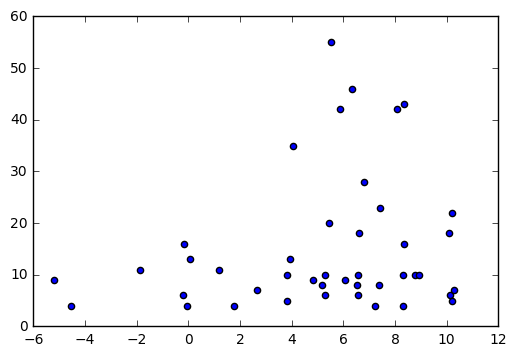

-0.578043053702

Predicted Distance
[6.4795864024096588, 18.371177022832935, 6.6497392796901789, 6.9447269359193422, 10.94476449659696, 8.3880081655885697, 10.069829809391878, 29.631090780032061, 6.2828175327038656, 12.887446191175769, 6.7915952615966448, 6.4745318935070335]

Actual Distance
3      765.37
13     219.24
16     102.00
18     128.16
19       9.72
21     180.90
22      32.64
25    1262.21
28      60.59
30      63.16
37      90.84
40     913.78
Name: Brunni totalDistance, dtype: float64


In [752]:
predict(all_cities[1])